# **Import the Depedencies**
*   pandas - making dataframes
*   matplotlib& seaborn - used to make graphs & plots
*   sklearn - to perform regression / classification
*   metrics - to identify outliers / errors etc.



In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# **Data Collection and preprocessing**


In [ ]:
# making dataframes from the csv

car_dataset = pd.read_csv('/content/used_car_dataset.csv')

In [ ]:
# 5 rows of the data are shown
car_dataset.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [ ]:
# checking the number of rows and columns
car_dataset.shape

(2105, 6)

In [ ]:
#checking info about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


# **Handling Missing values**

In [ ]:
car_dataset.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

# **Handling Duplicated Values**

In [ ]:
Duplicate_Value = car_dataset.duplicated().sum()
print(f'Number of duplicated rows are = {Duplicate_Value}')

Number of duplicated rows are = 92


In [ ]:
car_dataset = car_dataset.drop_duplicates()

print("Number of Duplicate values are =" ,car_dataset.duplicated().sum())

Number of Duplicate values are = 0


# **Distribution of Categorical data**

In [ ]:
print(car_dataset.fuel_type.value_counts())
print(car_dataset.city.value_counts())

Petrol        1283
Diesel         613
CNG             79
Petrol + 1      18
Electric         9
Diesel + 1       7
Hybrid           2
LPG              2
Name: fuel_type, dtype: int64
Bangalore      240
Hyderabad      240
Thane          239
Ahmedabad      239
Kolkata        234
Mumbai         232
Pune           225
Delhi          174
Chennai         75
Noida           40
Ambattur        19
Pallikarnai     17
Thiruvallur     16
Gurgaon          8
Poonamallee      8
Faridabad        7
Name: city, dtype: int64


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2013 non-null   object
 1   car_price_in_rupees  2013 non-null   object
 2   kms_driven           2013 non-null   object
 3   fuel_type            2013 non-null   object
 4   city                 2013 non-null   object
 5   year_of_manufacture  2013 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 110.1+ KB


In [ ]:
import re

# this function regular expression library to convert string into integers
# `"abc123.456def"` -> `123.456`
def preprocess_string(s):
    s = re.sub(r'[^\d.]', '',s)

    return float(s)

In [ ]:
# Apply preprocessing to convert price to float

car_dataset['car_price_in_rupees'] = car_dataset['car_price_in_rupees'].apply(preprocess_string)

# Apply preprocessing to convert kms_driven to int

car_dataset['kms_driven'] = car_dataset['kms_driven'].apply(preprocess_string).astype(int)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2013 non-null   object 
 1   car_price_in_rupees  2013 non-null   float64
 2   kms_driven           2013 non-null   int64  
 3   fuel_type            2013 non-null   object 
 4   city                 2013 non-null   object 
 5   year_of_manufacture  2013 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 110.1+ KB


# **Handling Outliers**

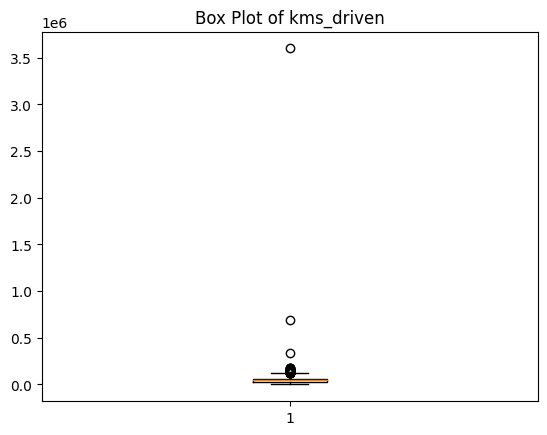

In [ ]:
# Apply visualization to understand the data

plt.boxplot(car_dataset['kms_driven'])
plt.title('Box Plot of kms_driven')
plt.show()

# **Identifing Outliers using IQR**

In [ ]:
# the quantile() method is often used with pandas DataFrames or Series objects to calculate specific quantiles of a dataset.
Q1 = car_dataset['kms_driven'].quantile(0.25)
Q3 = car_dataset['kms_driven'].quantile(0.75)
IQR = Q3 - Q1

# Using IQR to Filter Outliers
car_dataset_filtered = car_dataset[(car_dataset['kms_driven'] >= Q1 - 1.5 * IQR) & (car_dataset['kms_driven'] <= Q3 + 1.5 * IQR)]

car_dataset = car_dataset_filtered

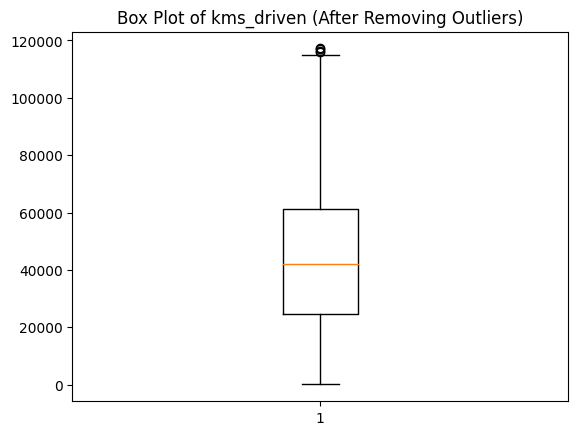

In [ ]:
plt.boxplot(car_dataset['kms_driven'])
plt.title('Box Plot of kms_driven (After Removing Outliers)')
plt.show()

In [ ]:
car_dataset.shape

(1966, 6)

In [ ]:
car_dataset.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,22.49,12999,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193,Petrol,Kolkata,2019


# **Data Cleaning for fuel_type**

In [ ]:
car_dataset.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG', 'Petrol + 1', 'Diesel + 1',
       'Hybrid', 'LPG'], dtype=object)

<Axes: xlabel='fuel_type', ylabel='Count'>

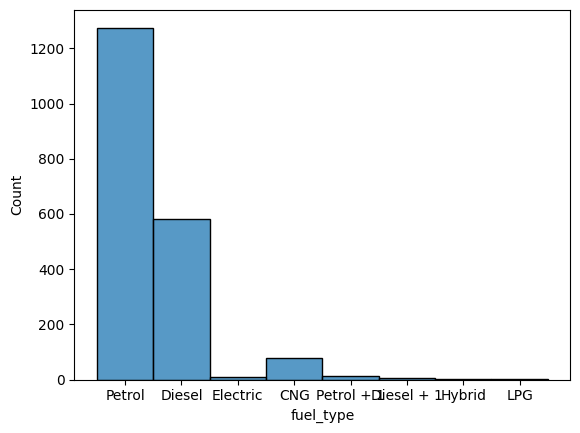

In [ ]:
# Visualizing the fuel type using plots

sns.histplot(car_dataset['fuel_type'])

In [ ]:
car_dataset.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG', 'Petrol + 1', 'Diesel + 1',
       'Hybrid', 'LPG'], dtype=object)

In [ ]:
# Replace any occurrence of "Diesel + 1" in the "fuel_type" column with just "Diesel".
car_dataset.loc[car_dataset["fuel_type"] == "Diesel + 1", "fuel_type"] = "Diesel"

# Replace any occurrence of "Petrol + 1" in the "fuel_type" column with just "Petrol".
car_dataset.loc[car_dataset["fuel_type"] == "Petrol + 1", "fuel_type"] = "Petrol"

In [44]:
car_dataset.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG'], dtype=object)

<Axes: xlabel='fuel_type', ylabel='Count'>

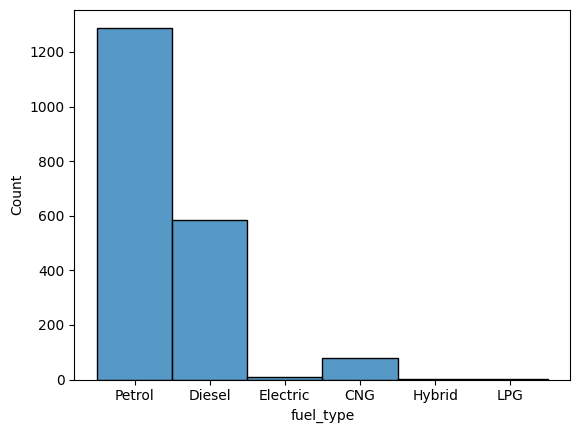

In [42]:
sns.histplot(car_dataset['fuel_type'])

## **Removing LPG and Hybrid as they are low in numbers**

In [43]:
car_dataset = car_dataset.drop(car_dataset[(car_dataset.fuel_type == "Hybrid")].index)
car_dataset = car_dataset.drop(car_dataset[(car_dataset.fuel_type == "LPG")].index)

In [45]:
car_dataset.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG'], dtype=object)

<Axes: xlabel='fuel_type', ylabel='Count'>

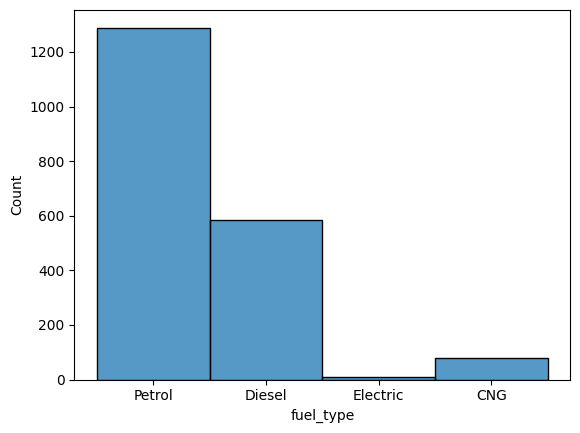

In [46]:
sns.histplot(car_dataset['fuel_type'])

## **Combine Electric and CNG to Eco Fuel**

In [54]:
car_dataset['fuel_type'] = car_dataset['fuel_type'].replace(['Electric', 'CNG'], 'alternative_eco_fuel')

In [55]:
car_dataset.fuel_type.unique()

array(['Petrol', 'Diesel', 'alternative_eco_fuel'], dtype=object)

<Axes: xlabel='fuel_type', ylabel='Count'>

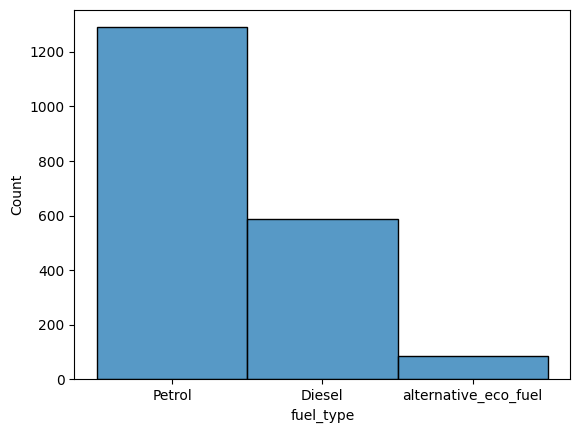

In [56]:
sns.histplot(car_dataset['fuel_type'])

# **One Hot Encoding**

In [58]:
# Creating binary indicator columns for each fuel type present in the dataset.
car_dataset['fuel_Petrol'] = car_dataset.apply(lambda row: 1 if (row["fuel_type"] == "Petrol") else 0, axis=1)
car_dataset['fuel_Diesel'] = car_dataset.apply(lambda row: 1 if (row["fuel_type"] == "Diesel") else 0, axis=1)
car_dataset['fuel_alternative_eco'] = car_dataset.apply(lambda row: 1 if (row["fuel_type"] == "alternative_eco_fuel") else 0, axis=1)

In [ ]:
# dropping fuel_type and using binary indicator, we are representing the fuel

car_dataset.drop(columns=['fuel_type'], inplace=True)

In [62]:
car_dataset.head()

,car_name,car_price_in_rupees,kms_driven,city,year_of_manufacture,fuel_Petrol,fuel_Diesel,fuel_alternative_eco
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,Mumbai,2016,1,0,0
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,Kolkata,2019,1,0,0
2,Tata Safari XZ Plus New,22.49,12999,Bangalore,2021,0,1,0
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,Thane,2016,1,0,0
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193,Kolkata,2019,1,0,0


<ipython-input-63-8b506d235c8b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


<Axes: ylabel='fuel_alternative_eco'>

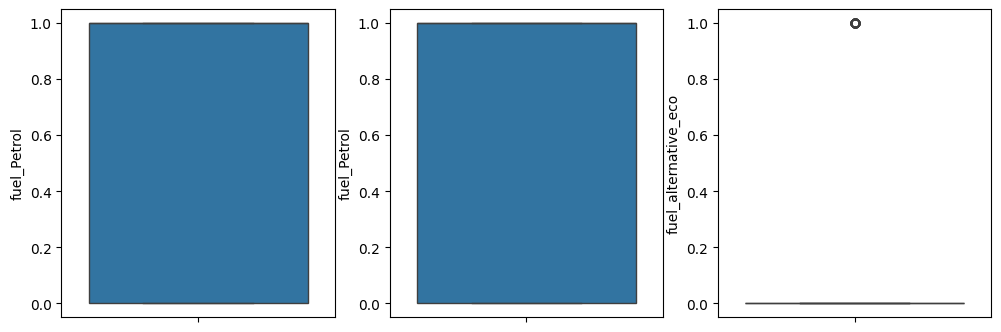

In [63]:
plt.subplots(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(car_dataset['fuel_Petrol'])

plt.subplot(1, 3, 2)
sns.boxplot(car_dataset['fuel_Petrol'])

plt.subplot(1, 3, 3)
sns.boxplot(car_dataset['fuel_alternative_eco'])

In [67]:
# IQR - Interquartile Range

Q1 = car_dataset['fuel_alternative_eco'].quantile(0.25)
Q3 = car_dataset['fuel_alternative_eco'].quantile(0.75)

IQR = Q3 - Q1
# Using IQR to Filter Outliers
car_dataset_filtered = car_dataset[(car_dataset['fuel_alternative_eco'] >= Q1 - 1.5 * IQR) & (car_dataset['fuel_alternative_eco'] <= Q3 + 1.5 * IQR)]

car_dataset = car_dataset_filtered

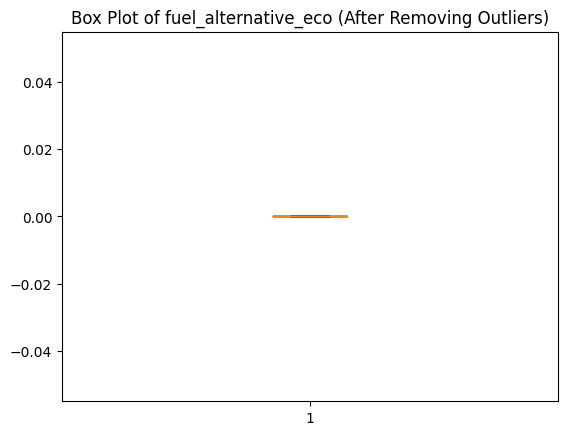

In [68]:
plt.boxplot(car_dataset['fuel_alternative_eco'])
plt.title('Box Plot of fuel_alternative_eco (After Removing Outliers)')
plt.show()

## **Data Cleaning for Year of Manufacture**

In [70]:
# Converting years to numbers by 2024 - year
car_dataset['age'] = car_dataset.apply(lambda row: 2024 - row["year_of_manufacture"], axis=1)

In [71]:
car_dataset.drop(columns=['year_of_manufacture'], inplace=True)

In [72]:
car_dataset.head()

,car_name,car_price_in_rupees,kms_driven,city,fuel_Petrol,fuel_Diesel,fuel_alternative_eco,age
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,Mumbai,1,0,0,8
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,Kolkata,1,0,0,5
2,Tata Safari XZ Plus New,22.49,12999,Bangalore,0,1,0,3
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,Thane,1,0,0,8
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193,Kolkata,1,0,0,5


## **Handling Outliers**

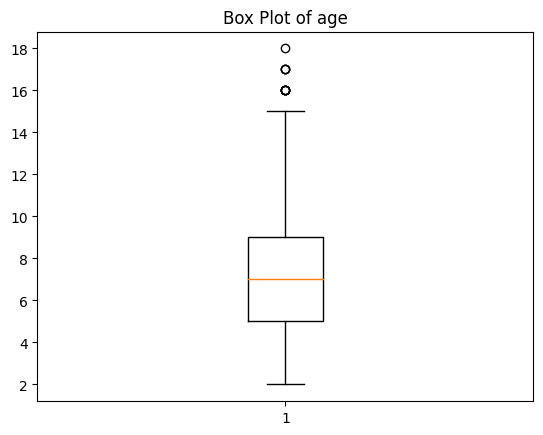

In [73]:
plt.boxplot(car_dataset['age'])
plt.title('Box Plot of age')
plt.show()

In [74]:
# IQR - Interquartile Range

Q1 = car_dataset['age'].quantile(0.25)
Q3 = car_dataset['age'].quantile(0.75)

IQR = Q3 - Q1
# Using IQR to Filter Outliers
car_dataset_filtered = car_dataset[(car_dataset['age'] >= Q1 - 1.5 * IQR) & (car_dataset['age'] <= Q3 + 1.5 * IQR)]

car_dataset = car_dataset_filtered

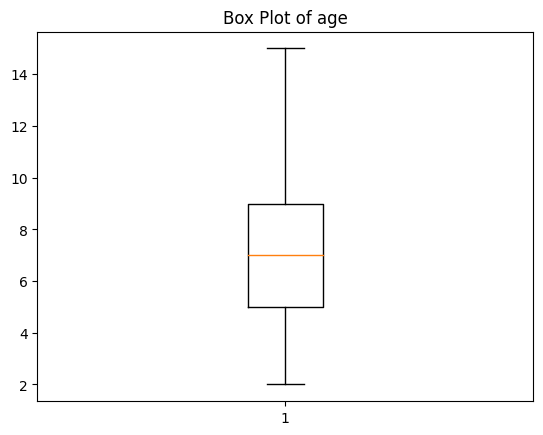

In [75]:
plt.boxplot(car_dataset['age'])
plt.title('Box Plot of age')
plt.show()

## **Data Cleaning for Car Name**

In [76]:
# By creating a new column called "car brand", we will clean the data

car_dataset.insert(1, "car_brand", car_dataset["car_name"].str.split(" ").str[0])
car_dataset.car_brand.unique()

array(['Hyundai', 'Maruti', 'Tata', 'Jeep', 'Toyota', 'Renault', 'Ford',
       'Porsche', 'Kia', 'BMW', 'Honda', 'Audi', 'MG', 'Skoda',
       'Mercedes-Benz', 'Chevrolet', 'Volkswagen', 'Volvo', 'Mahindra',
       'Nissan', 'Land', 'Isuzu', 'Jaguar', 'MINI', 'Datsun', 'Fiat',
       'Citroen'], dtype=object)

In [77]:
car_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Toyota', 'Volkswagen', 'Porsche', 'Volvo', 'Jaguar', 'Land',
              'Ford', 'Honda', 'Chevrolet', 'Hyundai', 'Kia', 'Nissan', 'Renault', 'Skoda', 'MINI', 'MG', 'Mahindra',
              'Tata', 'Isuzu', 'Jeep', 'Datsun', 'Fiat', 'Citroen', 'Bentley','Maruti']

In [79]:
for brand_name in car_brands:
    car_dataset.loc[car_dataset["car_brand"] == brand_name, "car_brand"] = ((car_brands.index(brand_name) + 1)
     / len(car_dataset)) * 100

In [80]:
car_dataset.car_brand.unique()

array([0.6970509383378015, 1.5013404825737267, 1.1260053619302948,
       1.2332439678284184, 0.21447721179624668, 0.8579088471849867,
       0.5361930294906166, 0.32171581769436997, 0.7506702412868633,
       0.10723860589812334, 0.5898123324396782, 0.16085790884718498,
       1.0187667560321716, 0.9115281501340482, 0.05361930294906167,
       0.6434316353887399, 0.2680965147453083, 0.37533512064343166,
       1.0723860589812333, 0.8042895442359249, 0.482573726541555,
       1.1796246648793565, 0.42895442359249336, 0.96514745308311,
       1.2868632707774799, 1.3404825737265416, 1.394101876675603],
      dtype=object)

In [81]:
car_dataset.rename(columns={'car_brand': 'car_brand_score'}, inplace=True)

In [82]:
car_dataset.drop(columns=['car_name'], inplace=True)
car_dataset.head()

,car_brand_score,car_price_in_rupees,kms_driven,city,fuel_Petrol,fuel_Diesel,fuel_alternative_eco,age
0,0.697051,4.45,22402,Mumbai,1,0,0,8
1,1.50134,2.93,10344,Kolkata,1,0,0,5
2,1.126005,22.49,12999,Bangalore,0,1,0,3
3,1.50134,6.95,45000,Thane,1,0,0,8
4,1.233244,12.00,11193,Kolkata,1,0,0,5


## **Data Cleaning for City**

In [84]:
# as city is irrelevant here for predicting used car price
# lets drop the city column
car_dataset.drop(columns=['city'], inplace=True)
car_dataset.head()

,car_brand_score,car_price_in_rupees,kms_driven,fuel_Petrol,fuel_Diesel,fuel_alternative_eco,age
0,0.697051,4.45,22402,1,0,0,8
1,1.50134,2.93,10344,1,0,0,5
2,1.126005,22.49,12999,0,1,0,3
3,1.50134,6.95,45000,1,0,0,8
4,1.233244,12.00,11193,1,0,0,5


## **Independant and Dependant features**

In [87]:
# y contains the dependant variable and x contains the independant
# we need to predict the dependant feature with the given indepedant features
X=car_dataset.drop('car_price_in_rupees',axis=1)
Y=car_dataset['car_price_in_rupees']

In [88]:
X.head()

,car_brand_score,kms_driven,fuel_Petrol,fuel_Diesel,fuel_alternative_eco,age
0,0.697051,22402,1,0,0,8
1,1.50134,10344,1,0,0,5
2,1.126005,12999,0,1,0,3
3,1.50134,45000,1,0,0,8
4,1.233244,11193,1,0,0,5


In [89]:
Y.head()

0     4.45
1     2.93
2    22.49
3     6.95
4    12.00
Name: car_price_in_rupees, dtype: float64

In [103]:
# train_test_split function splits arrays or matrices into random train and test subsets.
# test_size = 30% will be used for testing and random_state ensures same data is produced
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [104]:
X_train.shape, X_test.shape

((1305, 6), (560, 6))

In [105]:
Y_train.shape, Y_test.shape

((1305,), (560,))

## **Checking for Multicollinearity**

<ipython-input-106-c14bdeba535f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=X_train.corr()


<Axes: >

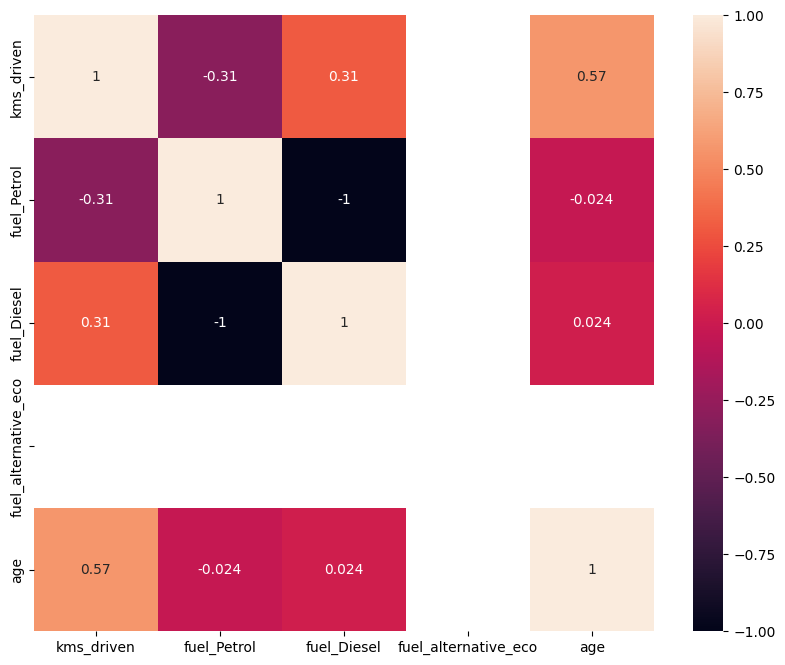

In [106]:
# multicollinearity is a situation in which two or more independent variables
# in a regression model are highly correlated with each other.
plt.figure(figsize=(10,8))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

## **Feature Scaling Or Standardization**

In [107]:
# The StandardScaler class is used for standardizing features
# by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# fit_transform is used to fit the training data to the scalar instance
# this allows the both test and training data to be consistent
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [108]:
X_train_scaled

array([[ 0.46051947,  0.13484693, -1.51507576,  1.51507576,  0.        ,
         0.38716147],
       [-0.58506359,  0.25052456,  0.660033  , -0.660033  ,  0.        ,
        -0.35204222],
       [ 1.38992664,  0.86745808,  0.660033  , -0.660033  ,  0.        ,
         0.01755963],
       ...,
       [-0.3527118 ,  2.11342512,  0.660033  , -0.660033  ,  0.        ,
         0.75676332],
       [-0.3527118 , -0.32478663,  0.660033  , -0.660033  ,  0.        ,
        -1.09124591],
       [ 1.38992664,  0.41971662,  0.660033  , -0.660033  ,  0.        ,
        -1.09124591]])

<ipython-input-109-f0b7b888449a>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

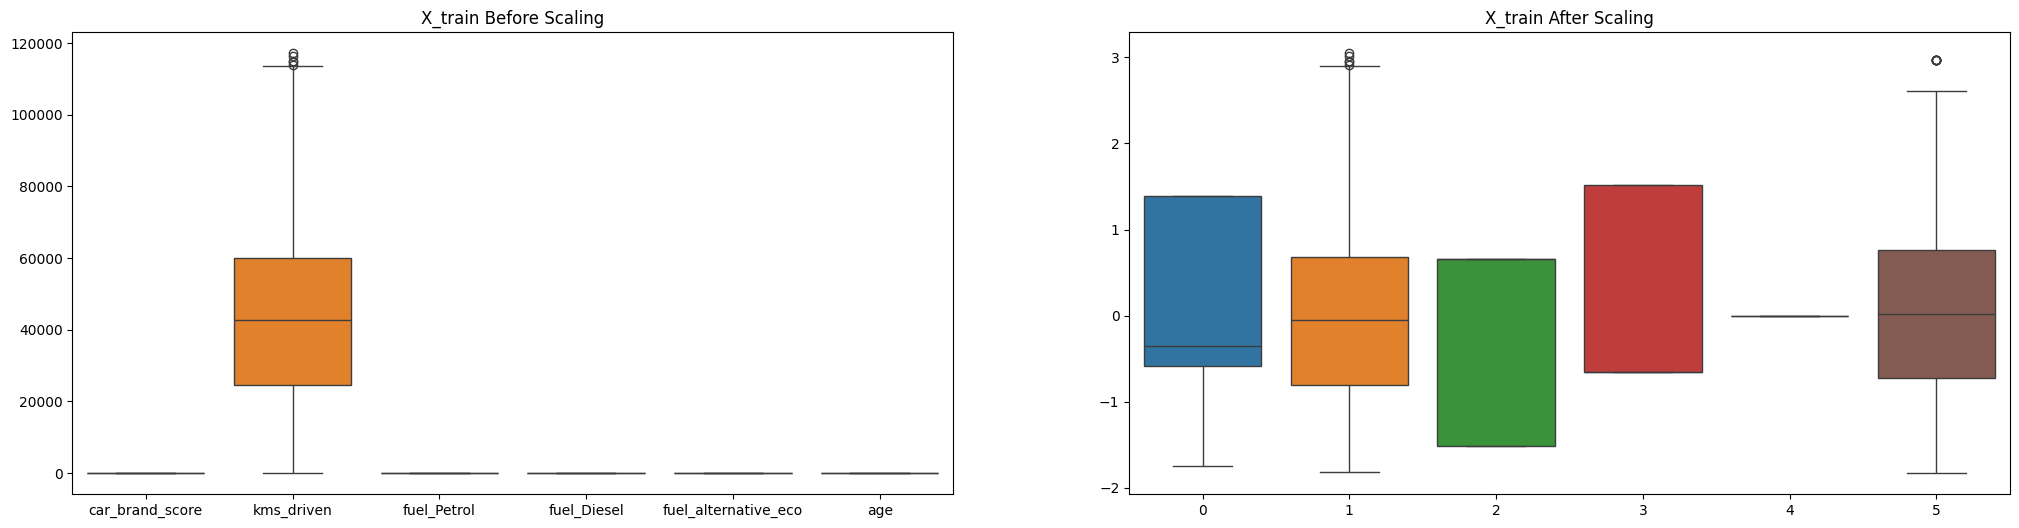

In [109]:
plt.subplots(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# **Model Seclection**



### **Linear Regression**

Mean absolute error 6.000032208063189
R2 Score 0.4339378595302301


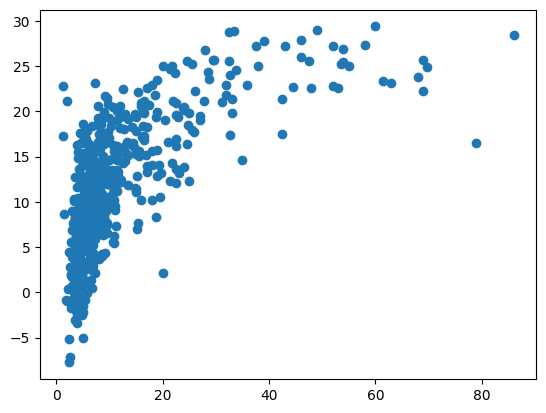

In [111]:
linreg=LinearRegression()

# Training the model on the training set
""" The fit() method trains the model by adjusting
 its parameters to minimize the difference between
 the predicted values and the actual target values. """
linreg.fit(X_train_scaled,Y_train)

# Making predictions on the testing set
""""The predict() method generates predicted
    target values (Y_pred) based on the input features."""
Y_pred=linreg.predict(X_test_scaled)

# Evaluating the model
"""MAE measures the average absolute difference
   between the predicted values and the actual values."""
"""R2 score calculated by comparing the variance of the
    predicted values to the variance of the actual values."""
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(Y_test,Y_pred)

## **Lasso Regression**

Mean absolute error 5.8572697301209375
R2 Score 0.38461211137415474


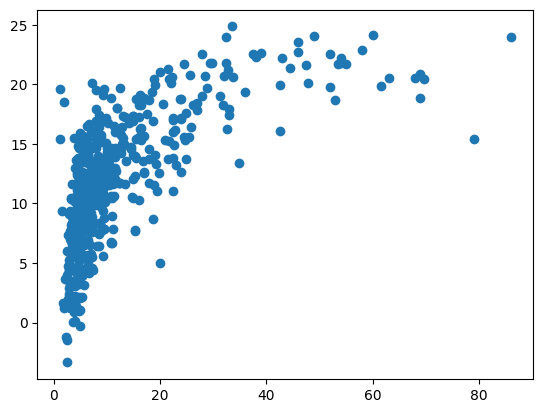

In [112]:
from sklearn.linear_model import Lasso

# Initializing the Lasso
lasso=Lasso()

# Training the model on the training set
lasso.fit(X_train_scaled,Y_train)
Y_pred=lasso.predict(X_test_scaled)

# Making predictions on the testing set
mae=mean_absolute_error(Y_test,Y_pred)

# Evaluating the model
score=r2_score(Y_test,Y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(Y_test,Y_pred)

### **KNN Regression**

Mean absolute error 4.475089285714286
R2 Score 0.5842513127005269


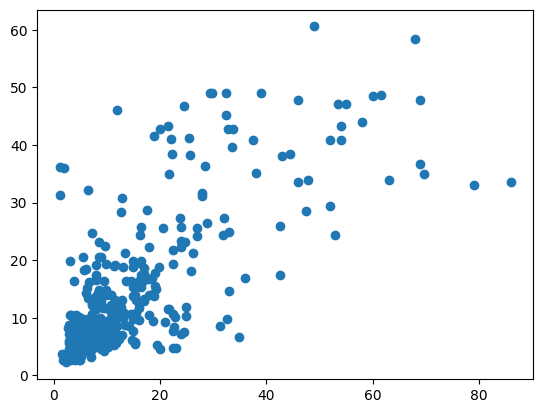

In [113]:
from sklearn.neighbors import KNeighborsRegressor

# Initializing the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)  # adjusting the number of neighbors to 3

# Training the model on the training set
knn_regressor.fit(X_train_scaled, Y_train)

# Making predictions on the testing set
Y_pred = knn_regressor.predict(X_test_scaled)

# Evaluating the model
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(Y_test,Y_pred)

### **AdaBoost**

Mean absolute error 6.349566088627737
R2 Score 0.4041514357780074


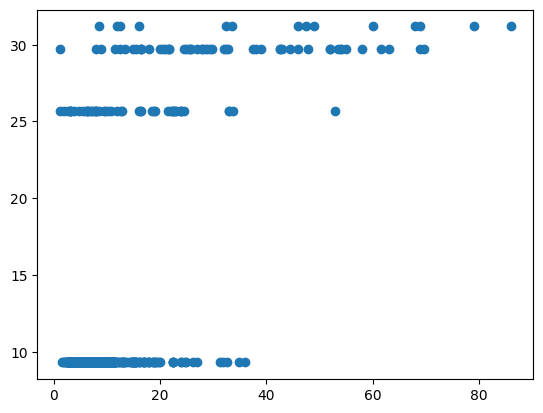

In [114]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initializing a base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(max_depth=1) # adjusting Weak learner, as needed

# Initializing the AdaBoost regressor
adaboost_regressor = AdaBoostRegressor(base_regressor, n_estimators=50, random_state=42)

# Train the model on the training set
adaboost_regressor.fit(X_train_scaled, Y_train)

# Make predictions on the testing set
Y_pred = adaboost_regressor.predict(X_test_scaled)

# Evaluating the model
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(Y_test,Y_pred)

### **Random Forest Regression**

Mean absolute error 3.575726220238095
R2 Score 0.7314071267132312


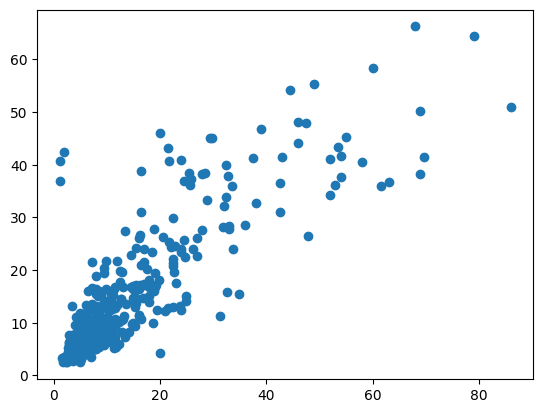

In [116]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training set
rf.fit(X_train_scaled, Y_train)

# Making predictions on the testing set
Y_pred = rf.predict(X_test_scaled)

# Evaluating the model
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(Y_test,Y_pred)

Model selection is the act of selecting perfect model which gives
minimum MAE and maximum RAE, here random forest regression satisfies it
so lets select that model for prediction

# **Creating ML Model using Random Forest Regressor**

Mean absolute error 3.575726220238095
R2 Score 0.7314071267132312


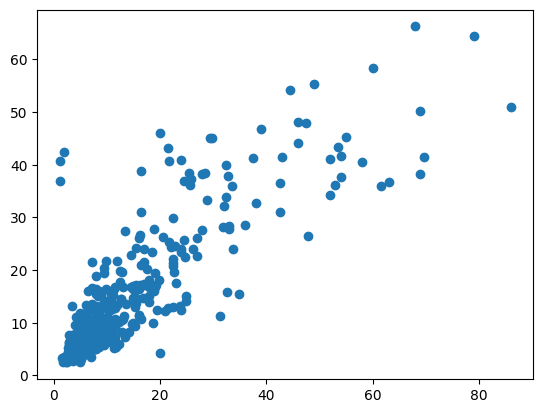

In [121]:
import pickle # To save model for future use

from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training set
model.fit(X_train_scaled, Y_train)

# Making predictions on the testing set
Y_pred = model.predict(X_test_scaled)

# Evaluating the model
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(Y_test,Y_pred)

# Writes the data into a file called car.price.pk1 and saves it for later use
pickle.dump(model , open('car_price.pk1' , 'wb'))

# **Final Predictions**

In [119]:
"""This line imports the pickle module, which
    provides functions for serializing and deserializing Python objects."""
import pickle

car_price_model = pickle.load(open('car_price.pk1' , 'rb'))

car_price_model_accuracy = car_price_model.score(X_test_scaled, Y_test)

print("Car Price Model Accuracy:" , car_price_model_accuracy * 100 , "%")

Car Price Model Accuracy: 73.14071267132312 %
